<a href="https://colab.research.google.com/github/bakkso/Data-Analysis-Programming/blob/main/GoogleNews_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. 데이터 준비#

In [2]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/KNU_Data-Analysis-Programming/archive/2023_9.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/KNU_Data-Analysis-Programming/archive/2023_9.csv')

In [3]:
train.head()

,Title,Publisher,DateTime,Link,Category
0,"Chainlink (LINK) Falters, Hedera (HBAR) Wobble...",Analytics Insight,2023-08-30T06:54:49Z,https://news.google.com/articles/CBMibGh0dHBzO...,Business
1,Funds punished for owning too few Nvidia share...,ZAWYA,2023-08-30T07:15:59Z,https://news.google.com/articles/CBMigwFodHRwc...,Business
2,Crude oil prices stalled as hedge funds sold: ...,ZAWYA,2023-08-30T07:31:31Z,https://news.google.com/articles/CBMibGh0dHBzO...,Business
3,Grayscale's Bitcoin Win Is Still Only Half the...,Bloomberg,2023-08-30T10:38:40Z,https://news.google.com/articles/CBMib2h0dHBzO...,Business
4,"I'm a Home Shopping Editor, and These Are the ...",Better Homes & Gardens,2023-08-30T11:00:00Z,https://news.google.com/articles/CBMiPWh0dHBzO...,Business


In [4]:
data_og = train.copy(deep = True)
random.seed(42)

#2. 데이터 보기#

In [5]:
data_og
data_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51302 entries, 0 to 51301
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      51302 non-null  object
 1   Publisher  51302 non-null  object
 2   DateTime   51302 non-null  object
 3   Link       51302 non-null  object
 4   Category   51302 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


#3. 데이터 클린징#

## 결측값##


In [6]:
data_og.isnull().sum()

Title        0
Publisher    0
DateTime     0
Link         0
Category     0
dtype: int64

## 이상값 ##

In [7]:
# 데이터 분석에 Link는 필요없으므로 제거
# 주어진 데이터는 2023년 9월에 대한 기사이므로 9월 기사인 것은 모두 동일하므로 DateTime 제거
data = data_og.drop(['Link', 'DateTime'], axis=1)
data

,Title,Publisher,Category
0,"Chainlink (LINK) Falters, Hedera (HBAR) Wobble...",Analytics Insight,Business
1,Funds punished for owning too few Nvidia share...,ZAWYA,Business
2,Crude oil prices stalled as hedge funds sold: ...,ZAWYA,Business
3,Grayscale's Bitcoin Win Is Still Only Half the...,Bloomberg,Business
4,"I'm a Home Shopping Editor, and These Are the ...",Better Homes & Gardens,Business
...,...,...,...
51297,Slovakia's Election Could Echo in Ukraine. Her...,The New York Times,Worldwide
51298,Things to know about the Nobel Prizes - The Wa...,The Washington Post,Worldwide
51299,"After brief calm, protests against killing of ...",Hindustan Times,Worldwide
51300,‘No one is safe’: France vows action as bedbug...,CNN,Worldwide


#4. 데이터 탐색#

In [8]:
# 카테고리 열 원-핫인코딩( 범주형 데이터를 숫자형태로 바꾸기위해 )
data_cate = pd.get_dummies(data, columns = ['Category'])

In [9]:
# 추후 시각화를 위해 500개 이하의 기사를 작성한 출판사는 제외
publisher_counts = data.groupby('Publisher').size()
small_publishers = publisher_counts[publisher_counts < 500].index
data_pub = data[~data['Publisher'].isin(small_publishers)]

# unique_publishers는 위 조건에서 제외하고 남은 출판사이름
unique_publishers = data_pub['Publisher'].unique()
print(unique_publishers)

data_pub

['Bloomberg' 'Reuters' 'CNBC' 'The New York Times' 'CNN' 'USA TODAY'
 'New York Post ' 'Fox News' 'Yahoo News' 'ESPN' 'Sports Illustrated']


,Title,Publisher,Category
3,Grayscale's Bitcoin Win Is Still Only Half the...,Bloomberg,Business
7,Judge allows age-discrimination lawsuit agains...,Reuters,Business
27,Adani Saga: India's Parliament Must Step In to...,Bloomberg,Business
33,Musk Says X Will Offer Video and Audio Calls i...,Bloomberg,Business
38,"China approves ChatGPT rivals from Baidu, others",Reuters,Business
...,...,...,...
51283,Claims Swirl Around Possible Friendly Fire Sho...,Yahoo News,Worldwide
51292,"Extremists ‘given operating space in Canada,’ ...",CNN,Worldwide
51296,"One dead, one in hospital after breaching whal...",CNN,Worldwide
51297,Slovakia's Election Could Echo in Ukraine. Her...,The New York Times,Worldwide


In [10]:
grouped = data_pub.groupby('Publisher')['Category'].value_counts()
type(grouped)
data_pub_grouped = grouped.to_frame()
data_pub_grouped

Category
Publisher  Category               
Bloomberg  Business            240
           Worldwide           162
           Headlines            53
           Technology           31
           Health               19
...                            ...
Yahoo News Business             24
           Health               18
           Entertainment        11
           Sports                7
           Technology            2

[79 rows x 1 columns]

In [11]:
publisher_counts = data_pub['Publisher'].value_counts()
print(publisher_counts)

CNN                   1420
Reuters                852
Fox News               818
ESPN                   794
Yahoo News             736
The New York Times     735
New York Post          633
CNBC                   562
Sports Illustrated     546
USA TODAY              533
Bloomberg              512
Name: Publisher, dtype: int64


In [13]:
category_counts = data_pub['Category'].value_counts()
category_counts_df = category_counts.to_frame()
category_counts
category_counts_df

,Category
Headlines,2070
Worldwide,1707
Sports,1638
Business,1346
Entertainment,640
Health,368
Science,198
Technology,174


#5. 데이터 시각화#

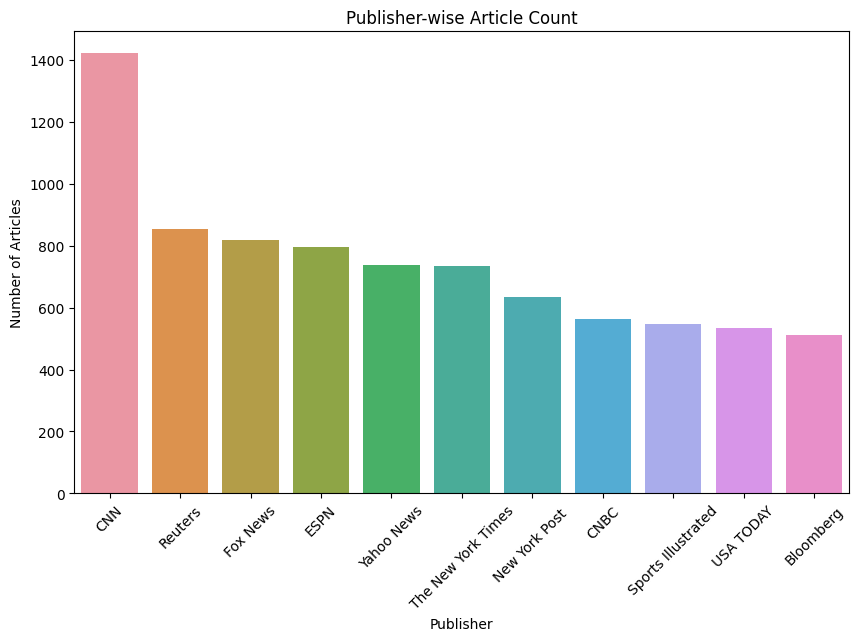

In [20]:
# 출판사별 시각화
plt.figure(figsize=(10,6))
sns.barplot(x=publisher_counts.index, y=publisher_counts.values)

plt.title('Publisher-wise Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')

plt.xticks(rotation=45)

plt.show()

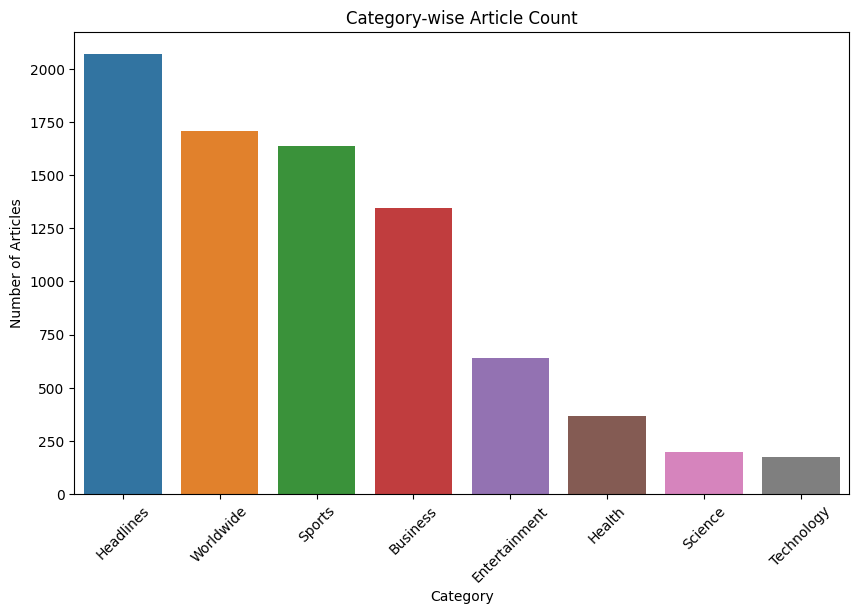

In [14]:
# 카테고리별 시각화
plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index, y=category_counts.values)

plt.title('Category-wise Article Count')
plt.xlabel('Category')
plt.ylabel('Number of Articles')

plt.xticks(rotation=45)

plt.show()

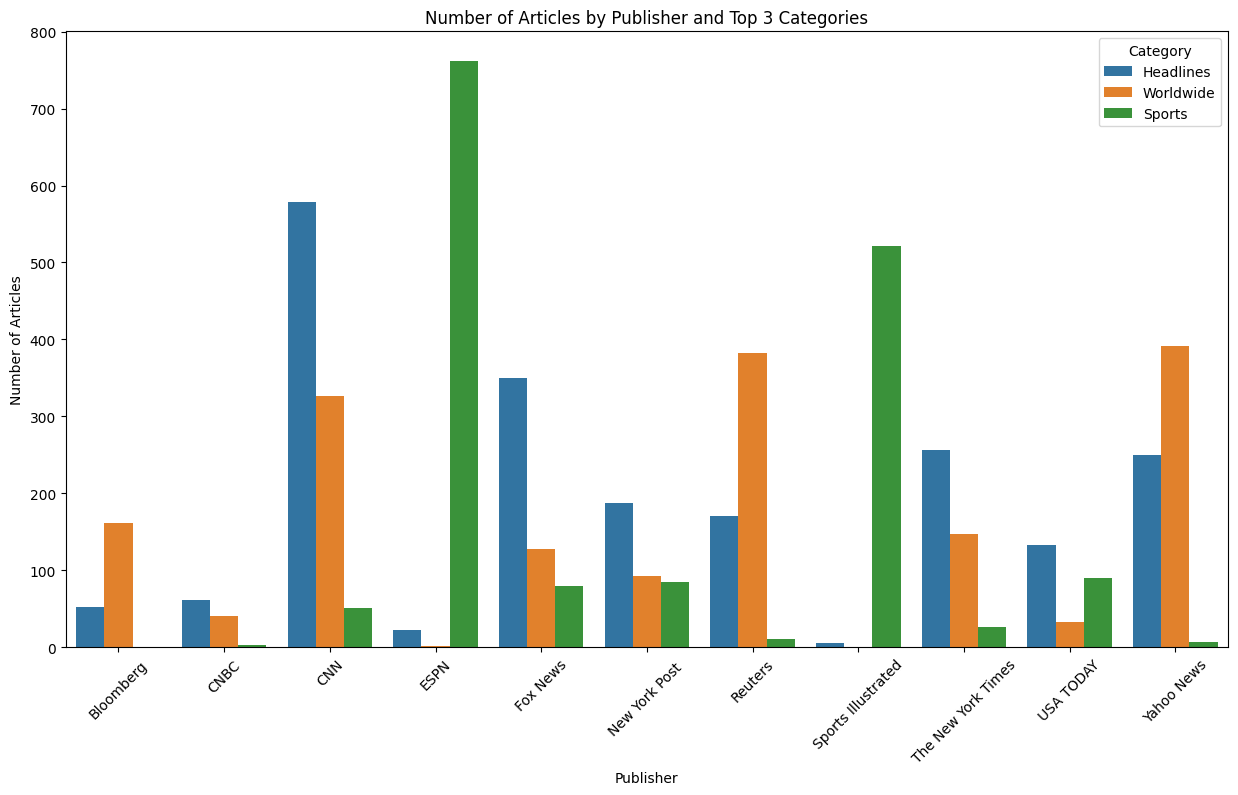

In [19]:
# 상위 3개 카테고리와 출판사와의 시각화분석
top_categories = ['Headlines', 'Worldwide', 'Sports']
filtered_df = data_pub[data_pub['Category'].isin(top_categories)]
grouped_df = filtered_df.groupby(['Publisher', 'Category']).size().reset_index(name='Article Count')
plt.figure(figsize=(15, 8))
sns.barplot(x='Publisher', y='Article Count', hue='Category', data=grouped_df)
plt.title('Number of Articles by Publisher and Top 3 Categories')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

#6. 분석#

1. 출판사별 기사수 분석: 정제된 데이터인 data_pub에서 'CNN'이 전체 출판사 중에서 가장 많은 기사를 출판했다. 이는 데이터에서 'CNN'이 가장 활발한 출판사임을 나타낸다.<br>

2. 카테고리별 기사수 분석: 상위 3개의 카테고리는 'Headlines', 'Worldwide', 'Sports'이다.<br>

3. 출판사별 상위 3개 카테고리에 대한 분석 : 기사 수 1위 출판사인 'CNN'은 3개의 카테고리 모두 적정한 비율로 기사를 작성할 것 이라고 생각했는데 'Sports'분야는 다른 2개의 분야보다 굉장히 적은 수의 기사를 작성한 것을 알 수 있다. 3개의 카테고리가 모두 비슷한 비율로 나오는 출판사는 없었다. 흥미롭게도, 상위 3개의 출판사인 'CNN','Reuters','Fox News'은 'Headlines'과 'Worldwide'의 비율이 'Sports'에 비해 굉장히 큰 것을 알 수 있다. 3위 카테고리인 'Sports'는 4위 출판사인 'ESPN'과 9위 출판사인 'Sports Illustrated'이 기사의 대부분을 차지하는 것을 알 수 있다.<br>

결론적으로, 'ESPN'과 'Sports Illustrated'은 'Sports' 분야에 특화된 출판사로, 'Sports' 관련 뉴스의 대다수를 담당하고 있다. 반면, 'CNN','Reuters','Fox News'은 'Sports' 외에 다양한 카테고리의 뉴스를 균형 있게 다루고 있음을 알 수 있다.